### Quantum Battery project

Step 1. Run below cell to import all package.

In [155]:
from qsee.compilation.qsp import QuantumStatePreparation
from qsee.core import ansatz, state, gradient, optimizer
from qsee.backend import constant, utilities
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import os
import base.gradient
import base.object
import base.hamiltonian
import numpy as np, qiskit
import numpy as np
from scipy.signal import find_peaks
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [199]:

def grad_Pmax(num_qubits, tmax, thetas, h1, gamma = 0):
    psi_t = base.object.psi_t(num_qubits, tmax, h1)
    h0 = base.hamiltonian.h0(num_qubits)
    grad = np.zeros(len(thetas), dtype=np.complex128)
    for i in range(num_qubits - 1):
        Pi = (1 + gamma) * base.hamiltonian.Pi(num_qubits, 'XX', i) + (1 - gamma) * base.hamiltonian.Pi(num_qubits, 'YY', i)
        grad[i] = 1j * tmax * (np.transpose(np.conjugate(psi_t)) @ (np.transpose(np.conjugate(Pi)) @ h0 - h0 @ Pi) @ psi_t)[0,0]
    if len(thetas) > num_qubits - 1:
        for i in range(num_qubits - 1):
            Pi = base.hamiltonian.Pi(num_qubits, 'ZZ', i)  
            grad[i + num_qubits - 1] = 1j * tmax * (np.transpose(np.conjugate(psi_t)) @ (np.transpose(np.conjugate(Pi)) @ h0 - h0 @ Pi) @ psi_t)[0,0]
    return grad
def find_Pmax(num_qubits, h1, t = 2, delta_t = 0.01, auto_stop = True):
    Ps = []
    ts = np.arange(0, t, delta_t)
    for t in ts:
        P = base.object.P(num_qubits, t, h1)
        Ps.append(P)
        peaks, _ = find_peaks(Ps)
        if len(peaks) == 1 and auto_stop:
            break
    Pmax = np.max(Ps)
    tmax = ts[np.argmax(Ps)]
    return Ps, Pmax, tmax
# num_qubits = 4
# thetas = np.array([1.2,1.4,1.1])
# h1 = base.hamiltonian.h1_xx(num_qubits, thetas)
# Ps1, Pmax1, tmax1 = find_Pmax(num_qubits, h1, delta_t = 0.1, )
# Ps2, Pmax2, tmax2 = find_Pmax(num_qubits, h1, delta_t = 0.01, )
# Ps3, Pmax3, tmax3 = find_Pmax(num_qubits, h1, delta_t = 0.001, )
# Ps4, Pmax4, tmax4 = find_Pmax(num_qubits, h1, delta_t = 0.0001, )
# print(Pmax1, tmax1)
# print(Pmax2, tmax2)
# print(Pmax3, tmax3)
# print(Pmax4, tmax4)

# plt.plot(Ps4)

### Model 1

[-3.36241523+0.j]
[-0.13949311+0.j]
[-0.09755814+0.j]
[-0.05639126+0.j]
[-0.07250821+0.j]
[-0.06096311+0.j]
[-0.04827695+0.j]
[-0.03680525+0.j]
[-0.02744147+0.j]
[-0.02020692+0.j]
[-0.01477928+0.j]
[-0.01077039+0.j]
[-0.0078338+0.j]
[-0.00569207+0.j]
[-0.00413366+0.j]
[-0.00300106+0.j]
[-0.00217846+0.j]
[-0.00158122+0.j]
[-0.00114766+0.j]
[-0.00083297+0.j]
[-0.00060456+0.j]
[-0.00043878+0.j]
[-0.00031845+0.j]
[-0.00023113+0.j]
[-0.00016775+0.j]
[-0.00012175+0.j]
[-8.83608826e-05+0.j]
[-6.41302657e-05+0.j]
[-4.65442465e-05+0.j]
[-3.3780724e-05+0.j]
[-2.45172578e-05+0.j]
[-1.7794051e-05+0.j]
[-1.2914505e-05+0.j]
[-9.37304489e-06+0.j]
[-6.80273619e-06+0.j]
[-4.9372664e-06+0.j]
[-3.58335217e-06+0.j]
[-2.60071298e-06+0.j]
[-1.88753649e-06+0.j]
[-1.36992972e-06+0.j]
[-9.94262864e-07+0.j]
[-7.21612671e-07+0.j]
[-5.23729554e-07+0.j]
[-3.80110629e-07+0.j]
[-2.7587538e-07+0.j]
[-2.00223882e-07+0.j]
[-1.45317798e-07+0.j]
[-1.0546825e-07+0.j]
[-7.65463821e-08+0.j]
[-5.55555692e-08+0.j]
[-4.0320929

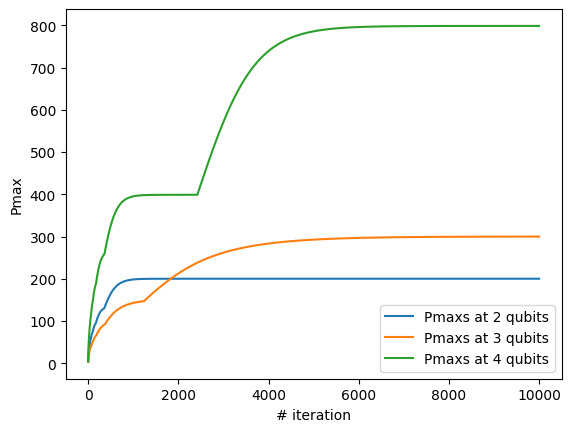

In [169]:

for num_qubits in [2,3,4]:
    # num_qubits = 2
    thetas = np.ones(num_qubits - 1)
    thetas = thetas.astype(np.complex128)
    Pmaxs = []
    tmaxs = []
    num_iteration = 10000
    for i in range(0, num_iteration):
        h1 = base.hamiltonian.h1_xx(num_qubits, thetas)
        _, Pmax, tmax = find_Pmax(num_qubits, h1)
        Pmaxs.append(Pmax)
        tmaxs.append(tmax)
        # grad_C = -grad_Pmax
        grad_C = grad_Pmax(num_qubits, tmax, thetas, h1)
        # if i == 0:
        #     m, v1 = list(np.zeros(thetas.shape[0])), list(
        #         np.zeros(thetas.shape[0]))
        # optimizer_params = [m, v1, i, grad_C]
        # thetas = optimizer.adam(thetas, *optimizer_params)
        thetas -= 1 * grad_C
        if i % 100 == 0:
            print(grad_C)
    plt.plot(range(0, num_iteration), Pmaxs, label=f"Pmaxs at {num_qubits} qubits")
plt.xlabel("# iteration")
plt.ylabel("Pmax")
plt.legend()

### Model 2

[-8.1746675 +0.j  4.80862794+0.j]
[-0.1158237 +8.8817842e-18j  0.06813159+0.0000000e+00j]
[-0.04241441+8.8817842e-18j  0.02494965+0.0000000e+00j]
[-0.01240611+8.8817842e-18j  0.00729771+0.0000000e+00j]
[-0.00355198-8.8817842e-18j  0.0020894 +0.0000000e+00j]
[-0.00101516+0.0000000e+00j  0.00059716-4.4408921e-18j]
[-0.00029009+8.8817842e-18j  0.00017064+0.0000000e+00j]
[-8.28965953e-05+0.j  4.87627031e-05+0.j]
[-2.36883067e-05+0.j  1.39342981e-05+0.j]
[-6.7691059e-06+0.j  3.9818270e-06+0.j]
[-1.93432122e-06+0.j  1.13783601e-06+0.j]
[-5.52746350e-07+0.j  3.25144912e-07+0.j]
[-1.57951288e-07-8.8817842e-18j  9.29125223e-08+4.4408921e-18j]
[-4.51357286e-08+0.0000000e+00j  2.65504286e-08-4.4408921e-18j]
[-1.28978627e-08-8.8817842e-18j  7.58697806e-09+0.0000000e+00j]
[-3.68565805e-09+0.j  2.16803415e-09+0.j]
[-1.05320366e-09-8.8817842e-18j  6.19531566e-10+0.0000000e+00j]
[-3.00960679e-10+0.j  1.77035693e-10+0.j]
[-8.60014371e-11+0.0000000e+00j  5.05890796e-11+4.4408921e-18j]
[-2.45756926e-11+0

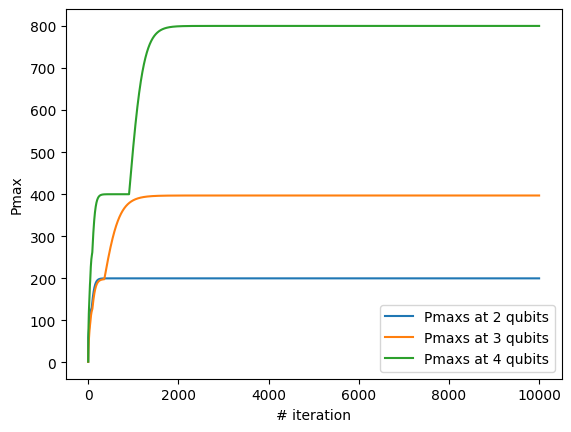

In [200]:
gamma = 0.7
for num_qubits in [2,3,4]:
    # num_qubits = 2
    thetas = np.ones(2*(num_qubits - 1))
    thetas = thetas.astype(np.complex128)
    Pmaxs = []
    tmaxs = []
    num_iteration = 10000
    for i in range(0, num_iteration):
        h1 = base.hamiltonian.h1_xy(num_qubits, thetas, gamma)
        _, Pmax, tmax = find_Pmax(num_qubits, h1)
        Pmaxs.append(Pmax)
        tmaxs.append(tmax)
        # grad_C = -grad_Pmax
        grad_C = grad_Pmax(num_qubits, tmax, thetas, h1, gamma)
        # if i == 0:
        #     m, v1 = list(np.zeros(thetas.shape[0])), list(
        #         np.zeros(thetas.shape[0]))
        # optimizer_params = [m, v1, i, grad_C]
        # thetas = optimizer.adam(thetas, *optimizer_params)
        thetas -= 1 * grad_C
        if i % 100 == 0:
            print(grad_C)
    plt.plot(range(0, num_iteration), Pmaxs, label=f"Pmaxs at {num_qubits} qubits")
plt.xlabel("# iteration")
plt.ylabel("Pmax")
plt.legend()

### Model 3

[-1.02208078+0.j  1.02208078+0.j]
[-0.62005659+0.j  0.62005659+0.j]
[-0.49835245+3.99680289e-17j  0.49835245-3.99680289e-17j]
[-0.45534985+0.j  0.45534985+0.j]
[-0.38524684+0.j  0.38524684+0.j]
[-0.34620219+0.j  0.34620219+0.j]
[-0.32647405+0.j  0.32647405+0.j]
[-0.31679709+0.j  0.31679709+0.j]
[-0.31072827+0.j  0.31072827+0.j]
[-0.27710421+0.j  0.27710421+0.j]
[-0.28270803+9.99200722e-18j  0.28270803-9.99200722e-18j]
[-0.25860052+0.j  0.25860052+0.j]
[-0.23419832+9.99200722e-18j  0.23419832-9.99200722e-18j]
[-0.251405+0.j  0.251405+0.j]
[-0.23468175+0.j  0.23468175+0.j]
[-0.21769864+8.8817842e-18j  0.21769864-8.8817842e-18j]
[-0.20084518+0.j  0.20084518+0.j]
[-0.22448155+1.94289029e-18j  0.22448155-1.94289029e-18j]
[-0.21352605+3.88578059e-18j  0.21352605-3.88578059e-18j]
[-0.20232195+0.j  0.20232195+0.j]
[-0.191038-3.88578059e-18j  0.191038+3.88578059e-18j]
[-0.17982014-1.16573418e-17j  0.17982014+1.16573418e-17j]
[-0.16879043+0.j  0.16879043+0.j]
[-0.19700298+3.33066907e-18j  0.1970

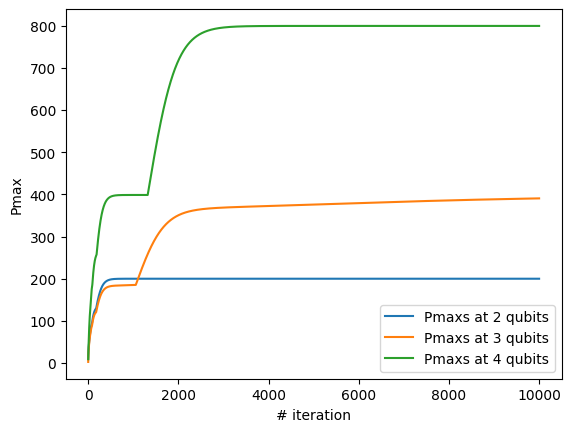

In [201]:

for num_qubits in [2,3,4]:
    # num_qubits = 2
    thetas = np.random.uniform(0,2*np.pi,2*(num_qubits - 1))
    thetas = thetas.astype(np.complex128)
    Pmaxs = []
    tmaxs = []
    num_iteration = 10000
    for i in range(0, num_iteration):
        h1 = base.hamiltonian.h1_xxz(num_qubits, thetas)
        _, Pmax, tmax = find_Pmax(num_qubits, h1)
        Pmaxs.append(Pmax)
        tmaxs.append(tmax)
        # grad_C = -grad_Pmax
        grad_C = grad_Pmax(num_qubits, tmax, thetas, h1)
        # if i == 0:
        #     m, v1 = list(np.zeros(thetas.shape[0])), list(
        #         np.zeros(thetas.shape[0]))
        # optimizer_params = [m, v1, i, grad_C]
        # thetas = optimizer.adam(thetas, *optimizer_params)
        thetas -= 1 * grad_C

        print(grad_C)
    plt.plot(range(0, num_iteration), Pmaxs, label=f"Pmaxs at {num_qubits} qubits")
plt.xlabel("# iteration")
plt.ylabel("Pmax")
plt.legend()

<img src = './docs/1.png' height = '400px'>
<img src = './docs/2.png'  height = '400px'>